In [1]:
import os
import pandas as pd
import matplotlib.pyplot as plt
from subprocess import check_output
import subprocess
import numpy as np
import time 

In [2]:
home_computers_list = os.listdir("home-computers")

years_list = []
years = {}
for item in home_computers_list:
    current_value = pd.read_csv("home-computers/" +item, skiprows = 1).set_index("Geographic Area Name")
    current_year = int(item[7:11])
    years_list.append(current_year)
    years[current_year] = current_value
    
#years

In [3]:
#Q17: what are the keys in years?
sorted_years_list = sorted(years_list)
sorted_years_list

[2013, 2014, 2015, 2016, 2017, 2018]

In [4]:
#Q18: how many households did Wisconsin have in 2018?
years[2018].loc["Wisconsin", "Estimate!!Total"]

2371960

In [5]:
#Q19: how many total households in the US are estimated to not have any computer at home? (2018)
no_computer_series = years[2018]["Estimate!!Total!!No Computer"]
no_computer_series.sum()

10285814

In [6]:
#Q20: what is the biggest per-state margin of error for "No Computer", as a fraction of the total estimate? (2018)
(years[2018]["Margin of Error!!Total!!No Computer"] / no_computer_series).max()

0.12375641594322287

In [7]:
#Q21: for Wisconsin and adjacent states, what percent of households are estimated to be without a computer? (2018)
midwest_states = ["Illinois", "Indiana", "Iowa", "Michigan", "Minnesota", "Wisconsin"]
midwest_states_dict = {state: (years[2018].loc[state, "Estimate!!Total!!No Computer"]/years[2018].loc[state, "Estimate!!Total"])*100 for state in midwest_states}
midwest_states_dict

{'Illinois': 8.524143737625552,
 'Indiana': 9.463486214247707,
 'Iowa': 9.468929459023103,
 'Michigan': 8.936374942955922,
 'Minnesota': 7.491847623005652,
 'Wisconsin': 9.582497175331794}

Text(0, 0.5, 'Percent of Households w/o Computers')

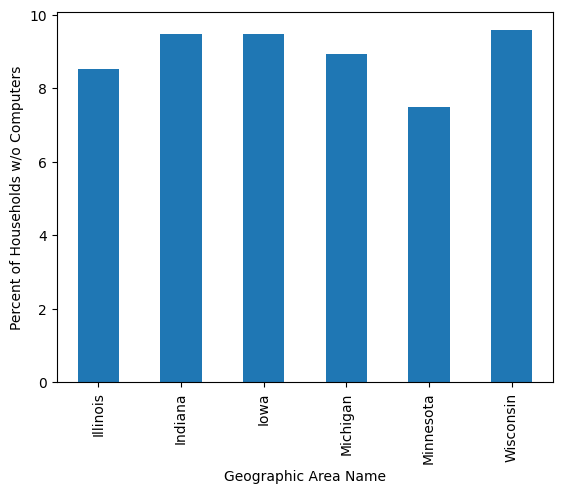

In [8]:
#Q22: same question, but answer with a bar plot.
midwest_states_series = pd.Series(midwest_states_dict)
ax = midwest_states_series.plot.bar()
ax.set_xlabel("Geographic Area Name")
ax.set_ylabel("Percent of Households w/o Computers")

([<matplotlib.axis.YTick at 0x7f5452303730>,
 [Text(0, 0, ''), Text(0, 0, ''), Text(0, 0, ''), Text(0, 0, '')])

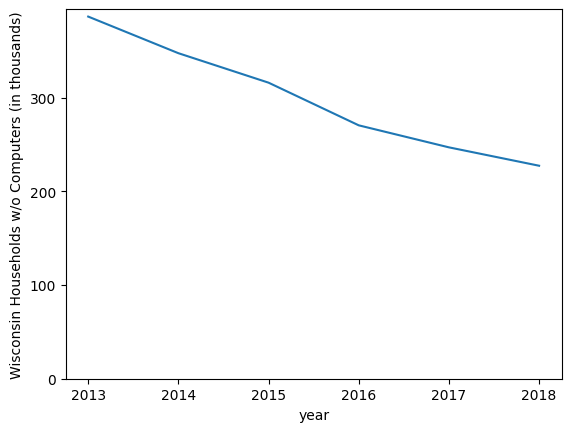

In [9]:
#Q23: how as the number of WI households without computers changed over recent years?
wisconsin_series = pd.Series({year: years[year].loc["Wisconsin", "Estimate!!Total!!No Computer"]/1000 for year in sorted_years_list})
plt.plot(wisconsin_series)
plt.xlabel("year")
plt.ylabel("Wisconsin Households w/o Computers (in thousands)")
plt.yticks([0, 100, 200, 300])
#references: https://www.geeksforgeeks.org/line-chart-in-matplotlib-python/
#           https://www.geeksforgeeks.org/how-to-change-the-number-of-ticks-in-matplotlib/

Text(0, 0.5, 'Tablets (in millions)')

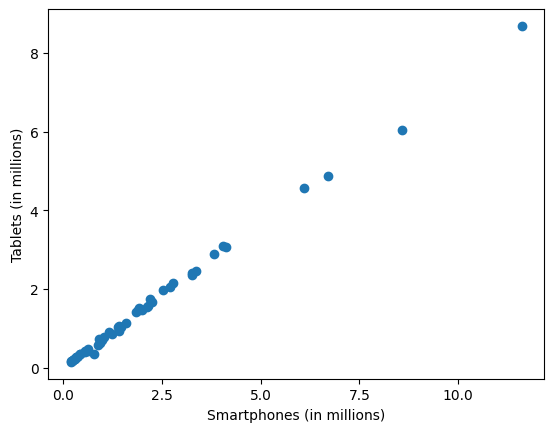

In [10]:
#Q24: what is the relationship between household with smartphones and those with tablets? (2018)
x = years[2018]["Estimate!!Total!!Has one or more types of computing devices!!Smartphone"]/1000000
y = years[2018]["Estimate!!Total!!Has one or more types of computing devices!!Tablet or other portable wireless computer"]/1000000

plt.scatter(x, y)
plt.xticks([0.0, 2.5, 5.0, 7.5, 10.0])
plt.xlabel("Smartphones (in millions)")
plt.ylabel("Tablets (in millions)")
#references: https://www.w3schools.com/python/python_ml_scatterplot.asp

In [11]:
#Q25: what is the first line of output from git log when run in the flask repo directory?
output = check_output("git log", cwd="flask", shell=True)
#output
str_output = str(output, encoding = "utf-8").split("\n")
#str_output

commits = [item for item in str_output if item[0:6]=="commit"]
        
commits[0]
# reference: https://tyler.caraza-harter.com/cs320/f22/lec/03-repro3/reading.html

'commit 660994efc761efdfd49ca442b73f6712dc77b6cf'

In [12]:
#Q26: What are the commit numbers of the 50 earliest commits?
commit_nums = [item[7:] for item in commits]
    
commit_nums[-50:]

['7b5015010bc8c2a2d56c7c50b37e5b9facdad102',
 '40e0024d7b87150ed694829a5335bd2435962225',
 '6dd92ae4b32c336564231e10db12458a8b9261ca',
 '1246f4088a4fdc00a79f8029ff5d77bfe4fc9b14',
 'c4f5c2fb9afc1679c085500830bd53fab93ad885',
 '1d8432ebfd1637eacab79a15e9b7963bf061371c',
 'fc94599285aa1aec50b3c9426697249e55edda0a',
 'c33675f0251071ea47ce166b81ce8c637842f091',
 '2d9bb692728fd76b19e467499caa4f5fcb07aede',
 'ca520fb7e4c29afccc637e61c11429a0f3e8d5ad',
 '08f1f0dc32004fae01cf96d1eed84e6461e698e5',
 '8009bd986940378bba1399dbfce90d03e441467b',
 'a42728568e18bedf588be2357b56021ab85b9fad',
 '959b5df00431c436474c5abca304e631c0de7721',
 '4affedec356ad8c9e6a107578f03fc7f5c615064',
 'de03143f6ecf9a36dd32f16f07309c64d4de03b0',
 'a01e8b49ca66608f0bd46134ff02deeb5724c799',
 '36071ca1f42a26ef327e9d14e4909a8c92cd4fae',
 '51c9829a9cdfa2bf301431f686d7a404cc7c5083',
 '2f5a4f8dbc832b0daebcd66ea8b3969589191fa7',
 '03148dba6b26a2694da1d466584f50189c52e7b3',
 'ef524f2cfd65377b3b9ce896e7a710472b13c0f6',
 'f2dc38cd

In [13]:
#Q27: what did the README file contain after the 3rd commit?
check_output("git checkout " + commit_nums[-3], cwd="flask", shell=True)
#check_output("pwd")
f = open("flask/README")
f.read()

#check_output("pwd")
check_output("git checkout main ", cwd="flask", shell=True)
#check_output("pwd")

Note: switching to '4ec7d2a0d8eac4f915dc0d38a886cd57045bb0c4'.

You are in 'detached HEAD' state. You can look around, make experimental
changes and commit them, and you can discard any commits you make in this
state without impacting any branches by switching back to a branch.

If you want to create a new branch to retain commits you create, you may
do so (now or later) by using -c with the switch command. Example:

  git switch -c <new-branch-name>

Or undo this operation with:

  git switch -

Turn off this advice by setting config variable advice.detachedHead to false

HEAD is now at 4ec7d2a0 Started working on documentation.
Previous HEAD position was 4ec7d2a0 Started working on documentation.
Switched to branch 'main'


b"Your branch is up to date with 'origin/main'.\n"

In [14]:
#Q28: how many pull requests were merged from each GitHub user? Only output users who appear 5 or more times.
usernames_list = []
pull_reqs_per_user = {}

#gets all usernames from pull request and add to a list (usernames_list)
#"from" ensures it is coming from a user
for idx in range(len(str_output)):
    if ("pull" in str_output[idx]) and ("from" in str_output[idx]):
        curr_pull_req = str_output[idx].split("/")[0]
        usernames_list.append(curr_pull_req.split()[-1])
#print(usernames_list)

for user in usernames_list:
    curr_user_count = usernames_list.count(user)
    if curr_user_count >= 5:
        pull_reqs_per_user[user] = curr_user_count

        
pull_reqs_per_user

{'pallets': 204,
 'pgjones': 14,
 'greyli': 42,
 'ThiefMaster': 11,
 'jeffwidman': 8,
 'garenchan': 8,
 'davidism': 45,
 'dawran6': 7,
 'untitaker': 20,
 'lord63-forks': 5,
 'methane': 5,
 'Winnetou': 6,
 'defuz': 6,
 'ThomasWaldmann': 13,
 'SimonSapin': 11}

In [15]:
#Q29: what is the output of pip3 instal? (yes, the mispelling was intentional)
try:
    msg = check_output(["pip3", "instal"], stderr=subprocess.STDOUT)
except subprocess.CalledProcessError as e:
    msg = e.output
    
str(msg, encoding = "utf-8")

'ERROR: unknown command "instal" - maybe you meant "install"\n'

In [16]:
def rand_df(rows):
    return pd.DataFrame(np.random.randint(10, size=(rows, 4)),
                        columns=["A", "B", "C", "D"],
                        index=[f"r{i}" for i in range(1, rows+1)])

Text(0, 0.5, 'milliseconds')

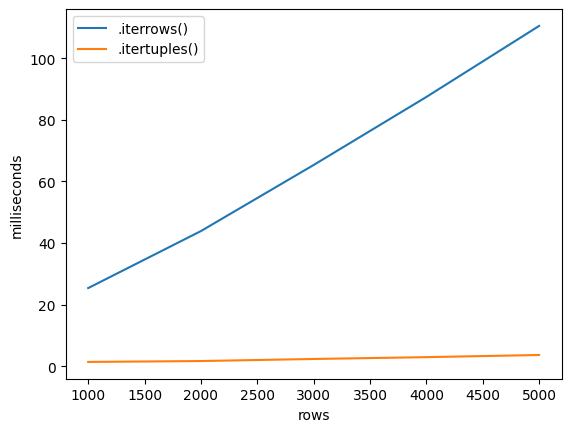

In [17]:
#Q30: what is faster for looping over a DataFrame, iterrows or itertuples?
def iterrows_time(df):
    t0 = time.time()
    # HOW LONG DOES THIS TAKE TO RUN, FOR DATAFRAMES WITH DIFFERENT NUMBERS OF ROWS?
    for row in df.iterrows():
        pass
    t1 = time.time()
    elapsed_time = (t1-t0)*1000
    return elapsed_time

def itertuples_time(df):
    t0 = time.time()
    for row in df.itertuples():
        pass
    t1 = time.time()
    elapsed_time = (t1-t0)*1000
    return elapsed_time

i = 1000
times_df = pd.DataFrame(dtype=float)
while i <= 5000:
    times_df.at[i, ".iterrows()"] = iterrows_time(rand_df(i))
    times_df.at[i, ".itertuples()"] = itertuples_time(rand_df(i))
    i += 1000 
    
rows_v_tuples_plot = times_df.plot.line()
rows_v_tuples_plot.set_xlabel("rows")
rows_v_tuples_plot.set_ylabel("milliseconds")

Text(0, 0.5, 'milliseconds')

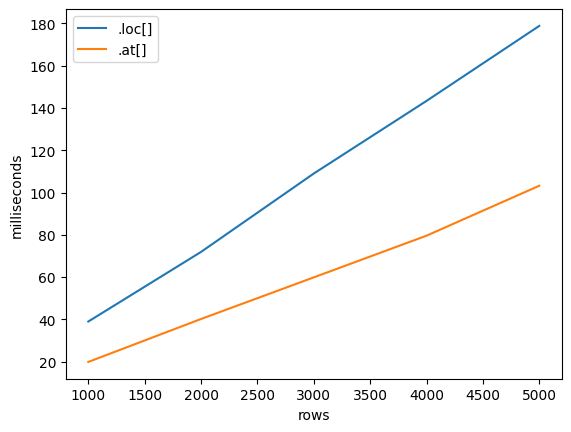

In [18]:
#Q31: what is faster, .loc, or .at?
def loc_time(df):
    t0 = time.time()
    total = 0
    for idx in df.index:
        for col in df.columns:
            total += df.loc[idx, col]
    t1 = time.time()
    elapsed_time = (t1-t0)*1000
    return elapsed_time

def at_time(df):
    t0 = time.time()
    total = 0
    for idx in df.index:
        for col in df.columns:
            total += df.at[idx, col]
    t1 = time.time()
    elapsed_time = (t1-t0)*1000
    return elapsed_time

i = 1000
q31_times_df = pd.DataFrame(dtype=float)
while i <= 5000:
    q31_times_df.at[i, ".loc[]"] = loc_time(rand_df(i))
    q31_times_df.at[i, ".at[]"] = at_time(rand_df(i))
    i += 1000 
    
loc_v_at_plot = q31_times_df.plot.line()
loc_v_at_plot.set_xlabel("rows")
loc_v_at_plot.set_ylabel("milliseconds")

Text(0, 0.5, 'milliseconds')

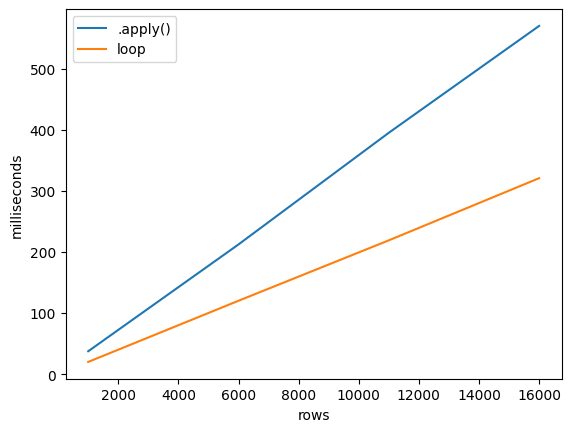

In [19]:
#Q32: what is faster, a loop or .apply?
def laugh(x):
    return "ha" * x

def apply_time(df):
    t0 = time.time()
    result = df["A"].apply(laugh).tolist()
    t1 = time.time()
    elapsed_time = (t1-t0)*1000

def loop_time(df):
    t0 = time.time()
    result = []
    for val in df["A"]:
        result.append(laugh(val))
    t1 = time.time()
    elapsed_time = (t1-t0)*1000

i = 1000
q32_times_df = pd.DataFrame(dtype=float)
while i <= 20000:
    q32_times_df.at[i, ".apply()"] = loc_time(rand_df(i))
    q32_times_df.at[i, "loop"] = at_time(rand_df(i))
    i += 5000 
    
loc_v_at_plot = q32_times_df.plot.line()
loc_v_at_plot.set_xlabel("rows")
loc_v_at_plot.set_ylabel("milliseconds")